# Caso práctico Final  

## Actividad grupal (formar grupos de 2 personas).

Semana #4 **Carlos Alfredo Ríos**

**Modelar a su preferencia (pero justificado datos de la cadena de supermercados de EEUU, Wallmart.** 

La base con la que trabajaremos este caso  práctico contiene información sobre datos históricos de las ventas de Wallmart desde 2010-02-05 hasta 2012-11-01, en el archivo WalmartStoresales. Dentro de este archivo encontrará los siguientes campos:

Tienda-el número de la tienda.

Fecha-la semana de ventas

Weekly_Sales - ventas para la tienda dada.

Holiday_Flag: si la semana es una semana especial de vacaciones 1 – Semana de vacaciones 0 – Semana no festiva.

Temperatura - Temperatura el día de la venta.

Fuel_price -costo del combustible en la región. 

IPC-índice de precios al consumidor vigente. 

Desempleo - tasa de desempleo predominante. 

Eventos festivos.

* Super bowl: 12 de febrero de 2010, 11 de febrero de 2011, 10 de febrero de 2012, 8 de febrero de 2013\ 

* Día del Trabajo: 10-sep-10, 9-sep-11, 7-sep-12, 6-sep-13\

* Acción de Gracias: 26-nov-10, 25-nov-11, 23-nov-12, 29-nov-13\

* Navidad: 31-dic-10, 30-dic-11, 28-dic-12, 27-dic-13

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1.Importe la base de datos a una base en Jupyter Notebook con pandas

In [2]:
import pandas as pd
df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# 2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención? 

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Los títulos de las columbas para cada variable se encuentran en idioma inglés. Para poder manejar la información de mejor manera, se procede a traducir los títulos y manejar el análisis en idioma español.

In [4]:
df.rename({'Store':'Tienda', 'Date': 'Fecha', 'Weekly_Sales':'Venta_semanal','Holiday_Flag':'Senal_Feriado','Temperature':'Temp','Fuel_Price':'Precio_combustible','CPI':'IPC','Unemployment':'Desempleo'}, axis=1, inplace=True)
df

,Tienda,Fecha,Venta_semanal,Senal_Feriado,Temp,Precio_combustible,IPC,Desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Para identificar las variables categóricas, se escribe la sentencia que arroje los descriptivos de las variables. De esta manera, sólamente las variables numéricas aparecerán puesto que los cálculos de media y los cuartiles se pueden obtener de variables de este tipo. De esta manera podremos notar cuales son las variables categóricas.

In [5]:
df.describe()

,Tienda,Venta_semanal,Senal_Feriado,Temp,Precio_combustible,IPC,Desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Se puede notar que la variable "Tienda", pese que es numérica, realmente es un identificador de la tienda de la cual se describen las demás variables, por lo tanto también ingresará en las variables categóricas junto con las variables categóricas. De la misma manera, para la variable "Señal_Feriado" que también se refleja como numérica pero en realidad es una marca de si la fecha en que se registra una venta es un día festivo (feriado). De modo que estas dos variables deben ser agregadas al subgrupo de variables categóricas conjuntamente con la variable fecha.

**Variables categóricas:**
* Fecha
* Tienda
* Señal_feriado

**Variables numéricas:**
* Venta_semanal
* Temp
* Precio_combustible
* IPC (índice de precios al consumidor vigente)
* Desempleo

# 3. Evalúe si la base contiene datos perdidos.

In [6]:
df.isna().sum()

Tienda                0
Fecha                 0
Venta_semanal         0
Senal_Feriado         0
Temp                  0
Precio_combustible    0
IPC                   0
Desempleo             0
dtype: int64

Se puede constatar que no existen valores perdidos en el dataset provisto. Significa que estamos utilizando una base de datos 10/10 y que se puede continuar con el proceso de evaluación y buscar si dentro de los valores existe alguno que se pueda considerar atípico que pueda generar problemas estadísticos posteriores.

# 4. Evalúe si alguna de las variables contiene datos atípicos (outliers). De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir.

Un gráfico de dspersión dentro del module seaborn puede permitir observar si existen datos muy dispersos que puedan considerarse outliers.

In [7]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

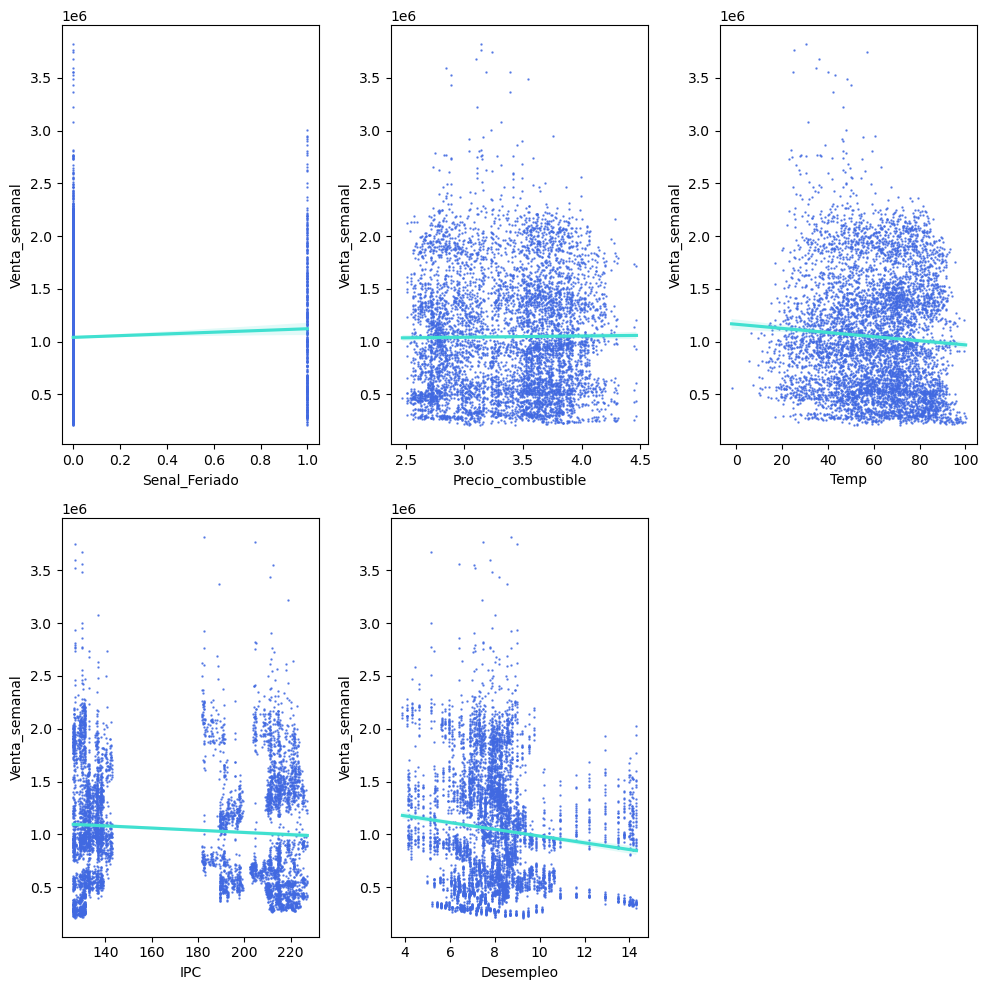

In [8]:
# Número de las variables
#n = 6
fig = plt.figure(figsize=(10,10))
# Correlaciones en pares
corr = df.corr()
#
cols = corr.nlargest(6, "Venta_semanal")["Venta_semanal"].index
# Calculate correlation
for i in np.arange(1,6):
    regline = df[cols[i]]
    ax = fig.add_subplot(2,3,i)
    sns.regplot(x=regline, y=df['Venta_semanal'], scatter_kws={"color": "royalblue", "s": 0.5},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

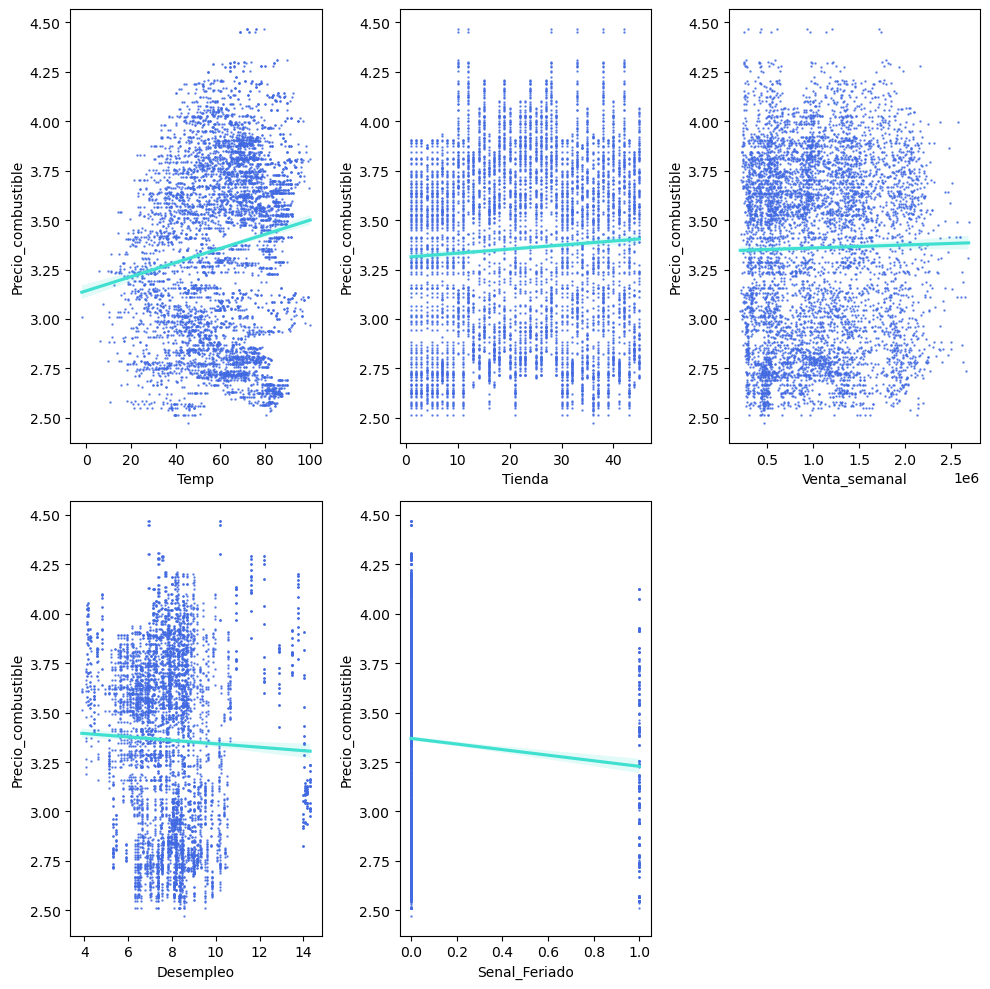

In [21]:
# Número de las variables
#n = 6
fig = plt.figure(figsize=(10,10))
# Correlaciones en pares
corr = df.corr()
#
cols = corr.nlargest(6, "Precio_combustible")["Precio_combustible"].index
# Calculate correlation
for i in np.arange(1,6):
    regline = df[cols[i]]
    ax = fig.add_subplot(2,3,i)
    sns.regplot(x=regline, y=df['Precio_combustible'], scatter_kws={"color": "royalblue", "s": 0.5},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

Aparentemente, se tienen ciertos valores de outliers en la variable de desempleo donde se nota una cola derecha.
La manera de eliminar esos datos tan apartados puede ser haciendo uso de los datos solamente entre el cuartil 1 y el 3 para poder obtener una distribución aproximadamente normal.


# 5. Grafique las distribuciones de las variables y a priori comente sobre ellas.

array([[<Axes: title={'center': 'Tienda'}>,
        <Axes: title={'center': 'Venta_semanal'}>,
        <Axes: title={'center': 'Senal_Feriado'}>],
       [<Axes: title={'center': 'Temp'}>,
        <Axes: title={'center': 'Precio_combustible'}>,
        <Axes: title={'center': 'IPC'}>],
       [<Axes: title={'center': 'Desempleo'}>, <Axes: >, <Axes: >]],
      dtype=object)

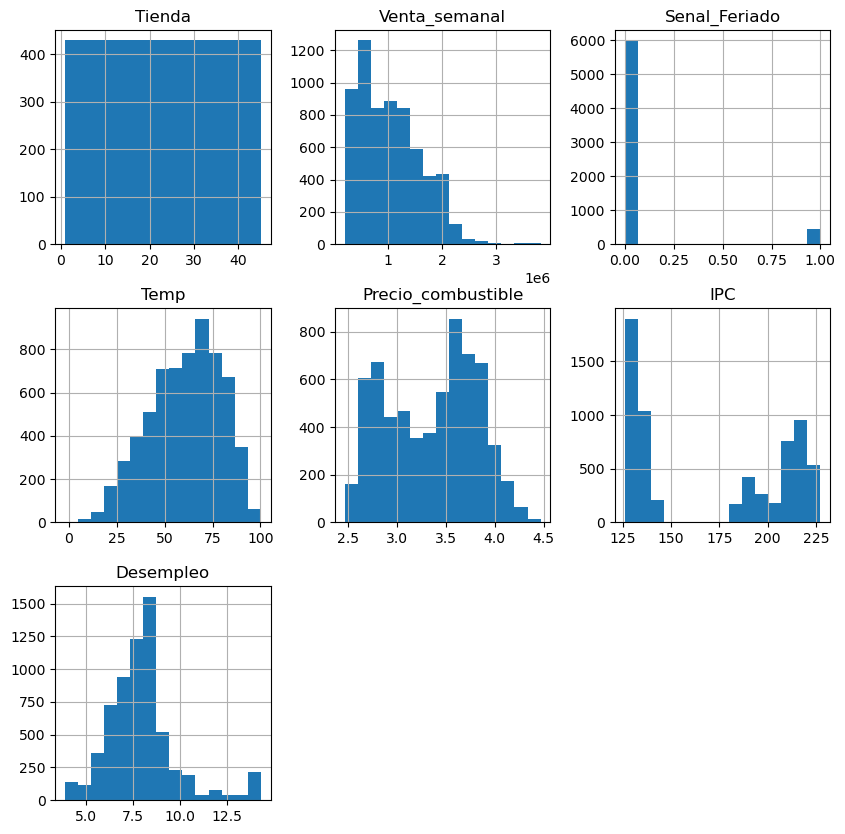

In [9]:
df[var_cuantitativas].hist(bins = 15, figsize = (10,10))

La variable fecha se encuentra en un formato categórico que no puede ser graficado. Se realizará una codificación para poder ser tratada. Se realizan gráficas específicas de 

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Fecha"] = label_encoder.fit_transform(df["Fecha"])

<Axes: >

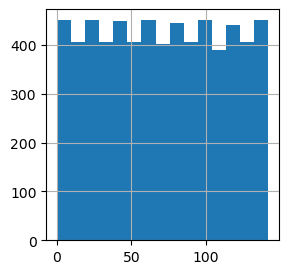

In [44]:
df['Fecha'].hist(bins = 15, figsize = (3,3))

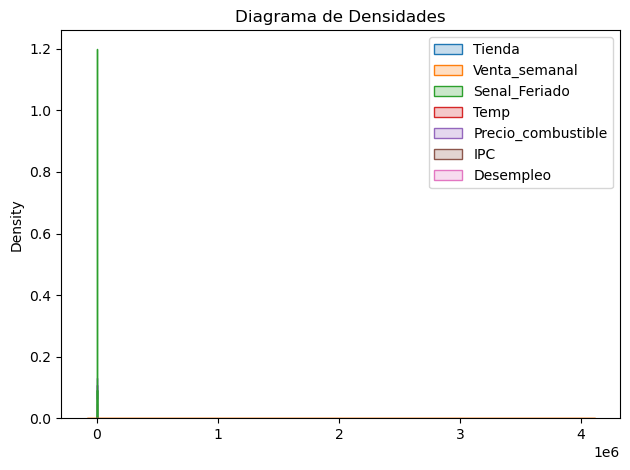

In [15]:
cols = df.columns.
for i in np.arange(1,2):
    regline = df[cols[i]]
    ax = fig.add_subplot(2,3,i)
    sns.kdeplot(df[df.select_dtypes('number').columns], fill=True)
plt.title("Diagrama de Densidades")
plt.tight_layout()


<Axes: xlabel='Fecha', ylabel='Density'>

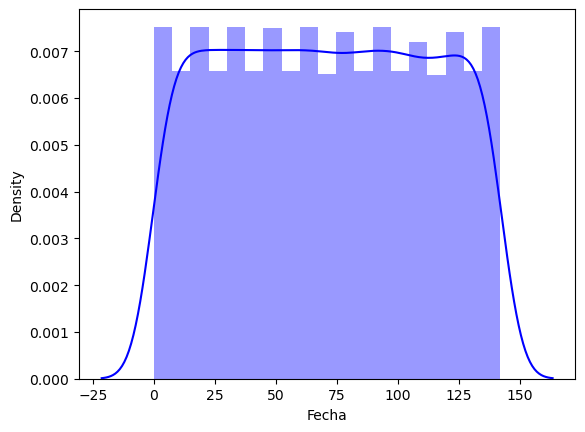

In [46]:
sns.distplot(df['Fecha'],color="blue")

Text(0.5, 1.0, 'Distribución de Variable objetivo')

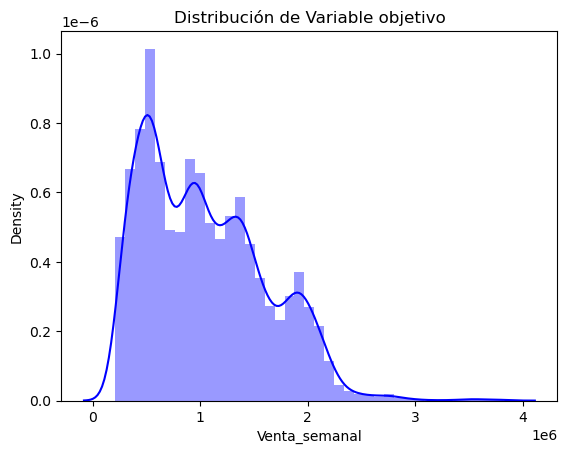

In [16]:
sns.distplot(df['Venta_semanal'],color="blue")
plt.title("Distribución de Variable objetivo")

In [17]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Venta_semanal.quantile(0.25)
Q3 = df.Venta_semanal.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

866808.5549999999


In [18]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Venta_semanal'] < (Q1 - 1.5 * IQR)) |(df['Venta_semanal'] > (Q3 + 1.5 * IQR)))]
df.shape

(6401, 8)

<Axes: xlabel='Venta_semanal', ylabel='Density'>

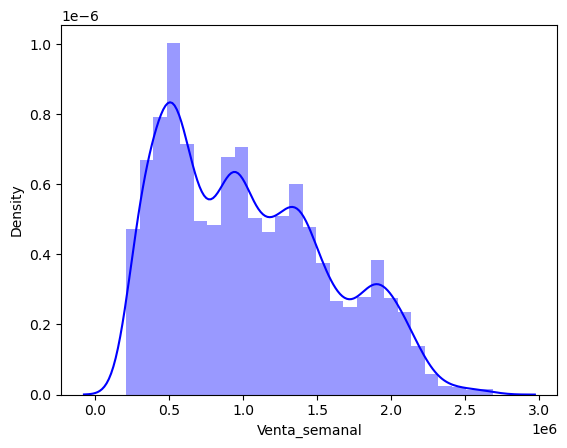

In [19]:
sns.distplot(df['Venta_semanal'],color="blue")

# 6. Obtenga las correlaciones entre los datos de corte numérico. 

Para la interpretación de la matriz de correlaciones, que es una herramienta que cuantifica el grado de asociación lineal entre dos variables, escogeré la más alta positiva y la más alta negativa para que puedan replicar la interpretación con las demás variables.

In [20]:
df.corr().style.background_gradient(cmap='coolwarm')

,Tienda,Venta_semanal,Senal_Feriado,Temp,Precio_combustible,IPC,Desempleo
Tienda,1.000000,-0.332881,0.003566,-0.026652,0.057863,-0.212481,0.222746
Venta_semanal,-0.332881,1.000000,0.025358,-0.044340,0.018189,-0.069617,-0.104298
Senal_Feriado,0.003566,0.025358,1.000000,-0.154556,-0.077808,0.000121,0.012385
Temp,-0.026652,-0.044340,-0.154556,1.000000,0.143080,0.176510,0.099266
Precio_combustible,0.057863,0.018189,-0.077808,0.143080,1.000000,-0.172078,-0.035469
IPC,-0.212481,-0.069617,0.000121,0.176510,-0.172078,1.000000,-0.304158
Desempleo,0.222746,-0.104298,0.012385,0.099266,-0.035469,-0.304158,1.000000


# 7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

Según el mapa de correlaciones. Existe muy poca asociación entre todas las variables. Una manera de poder plantear un modelo de regresión lineal es intentar explicar las ventas o el precio del combustible con las demás variables como explicativas de la variación de las ventas.

Como se puede ver, para el caso de tomar como variable dependiente las ventas semanales, las más altas asociaciones se presentan con las variables de precio del combustible o si es feriado. Si se toma en consideración la pendiente que se muestra en las gráficas de las ventas, veremos que la forma de interpretación sería la siguiente:
* Si aumento el precio de combustible, los valores de ventas semanales aumentaran (mayor recaudación)
* Si en esa semana existe un día feriado, las ventas también aumentarán. (mayor número de clientes visitando las tiendas)

Si por el contrario, se toma en consideración el IPC o el desempleo:
* Las ventas disminuyen si aumenta el desempleo.
* Las ventas disminuyen si el IPC aumenta.

Otro tipo de modelo puede darse al tomar como varible dependiente el Precio del combustible y tratar de explicar su variación con las variables explicativas de una tienda en especial, la temperatura y las ventas semanales.
* Si aumenta la temperatura, el precio del combustible debe ser mayor.
* Si aumentan las ventas semanales, el precio del combustible fue mayor.

**En esta ocasión, se decide analizar el primer planteamiento en el que la variable dependiente son las ventas.**

# 8. Indique que tipo de modelación realizarán y porqué.

De todo el análisis previo que se ha realizado del dataframe, podemos suponer que se trata de un modelo de regresión lineal. 
La variable dependiente que seleccionamos (ventas_semanal) no es de caracter categórico por lo que no requiere una codificación y su resultado no es un sí o un no.
Adicionalmente, de todas las variables restantes, tenemos variables numéricas y al menos dos categóricas que se pueden codificar mediante el método de "label encoder"y verificar como se comportan en nuestro modelado.

Para este caso en específico, la variable categórica de feriado se encuentra binarizada desde su estado original.
La variable tienda es un identificador en si misma que describe la tienda por medio de un número.

### Modelo de regresión Lineal

In [ ]:
Para este primer intento de modelado se incluyeron todas las variables

In [113]:
df.columns

Index(['Tienda', 'Fecha', 'Venta_semanal', 'Senal_Feriado', 'Temp',
       'Precio_combustible', 'IPC', 'Desempleo', 'y_preddef'],
      dtype='object')

In [112]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

regresion = ols("Venta_semanal~Precio_combustible+Senal_Feriado+Temp+IPC+Tienda+Fecha+Desempleo", data=df)
results = regresion.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Venta_semanal   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 22 May 2023   Prob (F-statistic):          6.37e-202
Time:                        23:15:31   Log-Likelihood:                -93154.
No. Observations:                6401   AIC:                         1.863e+05
Df Residuals:                    6393   BIC:                         1.864e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.932e+06   7.39

Se puede notar que la variable Precio de combustible tiene un valor ligeramente mayor al grado de aceptación de Pvalue=0.05 por lo que debe ser removida del modelo.

**Variables a remover:**
* Precio_combustible
* Temp

In [114]:
regresion1 = ols("Venta_semanal~Senal_Feriado+IPC+Tienda+Fecha+Desempleo", data=df)
results1 = regresion1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:          Venta_semanal   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 22 May 2023   Prob (F-statistic):          8.75e-204
Time:                        23:17:39   Log-Likelihood:                -93155.
No. Observations:                6401   AIC:                         1.863e+05
Df Residuals:                    6395   BIC:                         1.864e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.98e+06   4.92e+04     40.218

### Modelo de regreción logística

Podríamos tratar con una regresión logística en el caso de plantearnos un modelo logístico que analice la probabilidad de que una venta sea realizada en un feriado o día festivo que dependa estadisticamente de la Fecha, la temperatura registrada, el precio del combustible, el monto de venta semanal y el IPC.


In [115]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
regresionlog= smf.logit("Senal_Feriado~Precio_combustible+Venta_semanal+Temp+IPC+Tienda+Fecha+Desempleo", data=df)
resultslog = regresionlog.fit()
print(resultslog.summary())

Optimization terminated successfully.
         Current function value: 0.235170
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Senal_Feriado   No. Observations:                 6401
Model:                          Logit   Df Residuals:                     6393
Method:                           MLE   Df Model:                            7
Date:                Mon, 22 May 2023   Pseudo R-squ.:                 0.06222
Time:                        23:18:01   Log-Likelihood:                -1505.3
converged:                       True   LL-Null:                       -1605.2
Covariance Type:            nonrobust   LLR p-value:                 1.298e-39
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.2909      0.621     -2.078      0.038      -2.508      -0.074
Preci

*variables a remover:*
* tienda

In [116]:
regresionlog1= smf.logit("Senal_Feriado~Precio_combustible+Venta_semanal+Temp+IPC+Fecha", data=df)
resultslog1 = regresionlog1.fit()
print(resultslog1.summary())

Optimization terminated successfully.
         Current function value: 0.235873
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Senal_Feriado   No. Observations:                 6401
Model:                          Logit   Df Residuals:                     6395
Method:                           MLE   Df Model:                            5
Date:                Mon, 22 May 2023   Pseudo R-squ.:                 0.05941
Time:                        23:18:31   Log-Likelihood:                -1509.8
converged:                       True   LL-Null:                       -1605.2
Covariance Type:            nonrobust   LLR p-value:                 2.712e-39
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1717      0.493     -0.348      0.728      -1.138       0.794
Preci

# 9. Verifique los supuestos, de haber escogido el enfoque econométrico.

Se escoge el camino del enfoque de machine learning por lo que los supuestos no son requeridos.

**1. Linealidad**

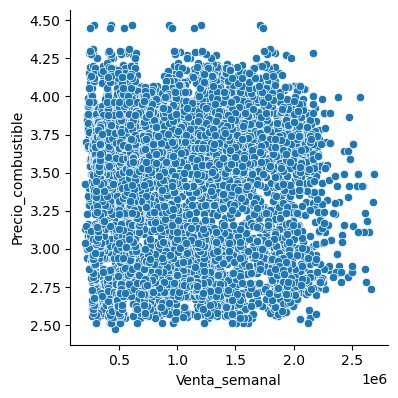

In [150]:
sns.pairplot(x_vars='Venta_semanal', y_vars='Precio_combustible' , data=df, size=4)

La nube de puntos no parece describir una linea recta pero se supondrá entonces que existe algún tipo de linealidad.

**2. Normalidad de residuos**

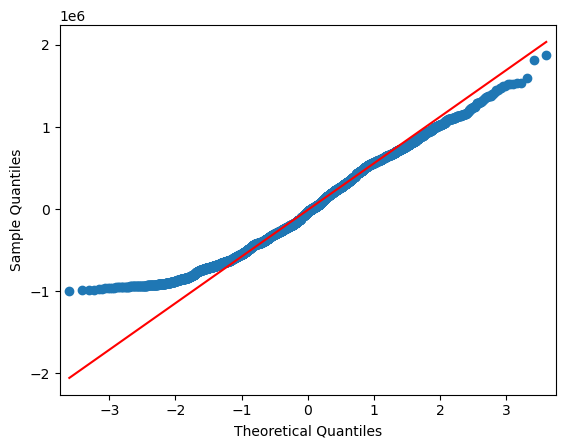

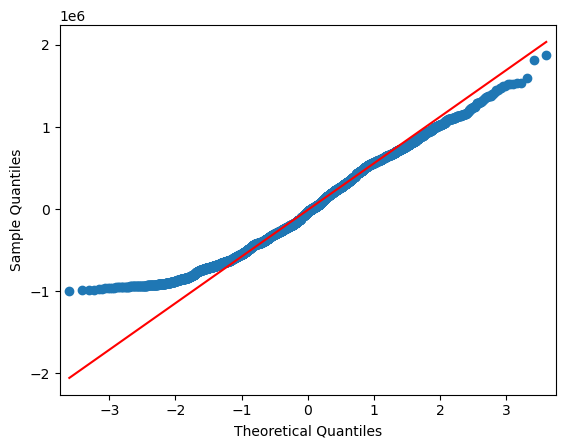

In [151]:
sm.qqplot(results.resid, line='q')

Las líneas azules que representan a los residuos caen cerca de la línea recta sobretodo en la posición central, pero también existen unos puntos que caen por fuera de la línea, por lo que un anális de valores extremos podría ser conveniente para mejorar el modelo. Para validar la prueba gráfica con la estadística, se recurre a una de las pruebas detalladas en la secciónde supuestos. En este caso, aplicaremos la prueba de Jarque-Bera para validar la hipótesis de normalidad en residuos.

In [152]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 172.74028521937223),
 ('Chi^2 two-tail prob.', 3.0897522944489375e-38),
 ('Skew', 0.2692083622269549),
 ('Kurtosis', 2.401850937305363)]

In [153]:
results.resid.mean()

1.2215879294597028e-08

Los resultados que arroja la prueba son bastante bajos por lo que validamos la hipótesis.

**3. Homocedasticidad de Residuos**

In [154]:
y_pred=results1.predict()
df['y_pred']=y_pred
df.head()

,Tienda,Fecha,Venta_semanal,Senal_Feriado,Temp,Precio_combustible,IPC,Desempleo,y_preddef,y_pred
0,1,19,1643690.90,0,42.31,2.572,211.096358,8.106,1.284577e+06,1.284577e+06
1,1,52,1641957.44,1,38.51,2.548,211.242170,8.106,1.332598e+06,1.332598e+06
2,1,85,1611968.17,0,39.93,2.514,211.289143,8.106,1.256600e+06,1.256600e+06
3,1,118,1409727.59,0,46.63,2.561,211.319643,8.106,1.242764e+06,1.242764e+06
4,1,20,1554806.68,0,46.50,2.625,211.350143,8.106,1.283570e+06,1.283570e+06


Text(0.5, 1.0, 'Gráfica de Residuos')

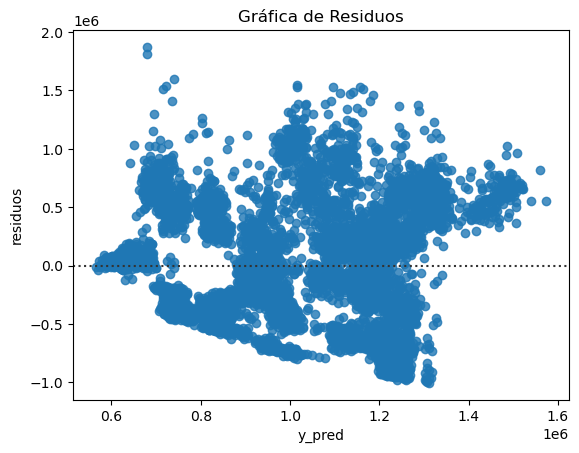

In [155]:
#sns.residplot(y_pred, results.resid())
sns.residplot(x=y_pred,y=results1.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de Residuos")

# 10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.

In [48]:
df.columns

Index(['Tienda', 'Fecha', 'Venta_semanal', 'Senal_Feriado', 'Temp',
       'Precio_combustible', 'IPC', 'Desempleo'],
      dtype='object')

In [118]:
regresion_def = ols("Venta_semanal~Senal_Feriado+IPC+Tienda+Fecha+Desempleo", data=df)
results_def = regresion_def.fit()
print(results_def.summary())

                            OLS Regression Results                            
Dep. Variable:          Venta_semanal   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 22 May 2023   Prob (F-statistic):          8.75e-204
Time:                        23:19:10   Log-Likelihood:                -93155.
No. Observations:                6401   AIC:                         1.863e+05
Df Residuals:                    6395   BIC:                         1.864e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.98e+06   4.92e+04     40.218

In [119]:
from sklearn.linear_model import LinearRegression

Separamos a los predictores de nuestra variable objetivo:

In [120]:
X = df[df.columns.difference(['Venta_semanal'])]
y = df.Venta_semanal

Dividimos en dos partes a nuestra base de datos en un 80% para que el algoritmo entrene y un 20% para aplicar nuestras métricas de desempeño.

In [121]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20,random_state =123)

In [122]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(5120, 8)  <class 'pandas.core.frame.DataFrame'>
(5120,) 	  <class 'pandas.core.series.Series'>
(1281, 8)  <class 'pandas.core.frame.DataFrame'>
(1281,) 	  <class 'pandas.core.series.Series'>


## Entrenar al modelo de regresión lineal por sklearn. 

Una vez tenemos nuestros diferentes conjuntos de datos, procedemos a entrenar al modelo:

### Modelo Sklearn

In [123]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

### Realizar las predicciones Sklearn

In [124]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

### Evalación del modelo y Métricas correspondientes.

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

**MSE**

In [126]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

256190035025.55606
255333553178.46637


**RMSE**

In [127]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

506152.18563743855
505305.4058472622


**MAE**

In [128]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

422624.4898015458
421535.05491547653


In [129]:
from sklearn.metrics import r2_score
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)
# Print the Intercept:
print('\nIntercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('Pendiente:', modelo_regresion.coef_) 

El R^2 del subconjunto de entrenamiento es: 0.13612284885254256
El R^2 del subconjunto de prueba es: 0.14810511206776467

Intercepto: -317862.8243000376
Pendiente: [-1.90438836e+04  1.46388624e+02  2.21835483e+02  9.08748787e+03
  1.32053599e+03  5.16690059e+02  4.44718021e+03  1.25025645e+00]


# 11.Grafique a los valores predicho de modelo vs los valores reales.
* ¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta. 

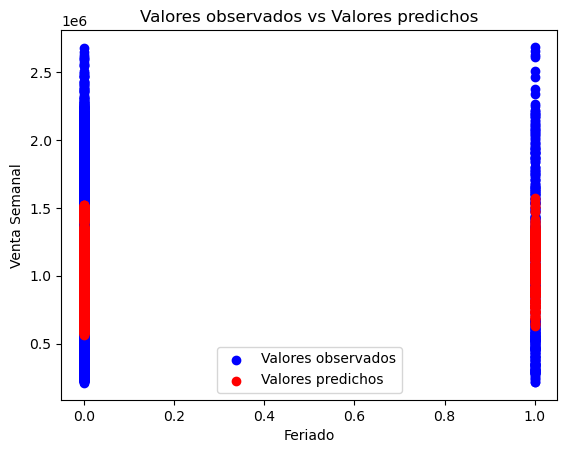

In [134]:
y_pred_def = results_def.predict()
df['y_preddef']=y_pred_def
plt.scatter(df['Senal_Feriado'],df['Venta_semanal'], color='blue', label='Valores observados')
plt.scatter(df['Senal_Feriado'],df['y_preddef'], color='red', label='Valores predichos')
plt.xlabel('Feriado')
plt.ylabel('Venta Semanal')
plt.title('Valores observados vs Valores predichos')
plt.legend()
plt.show()

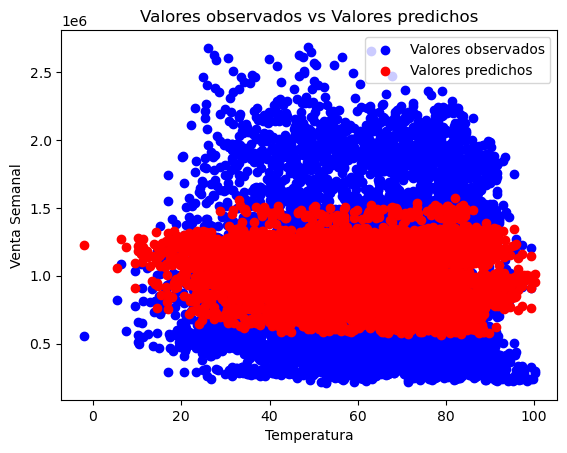

In [135]:
y_pred_def = results_def.predict()
df['y_preddef']=y_pred_def
plt.scatter(df['Temp'],df['Venta_semanal'], color='blue', label='Valores observados')
plt.scatter(df['Temp'],df['y_preddef'], color='red', label='Valores predichos')
plt.xlabel('Temperatura')
plt.ylabel('Venta Semanal')
plt.title('Valores observados vs Valores predichos')
plt.legend()
plt.show()

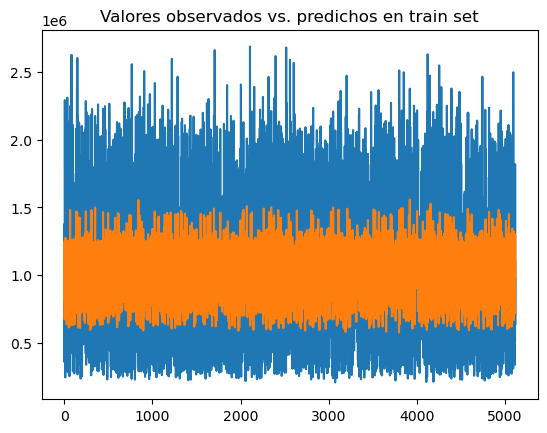

In [136]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

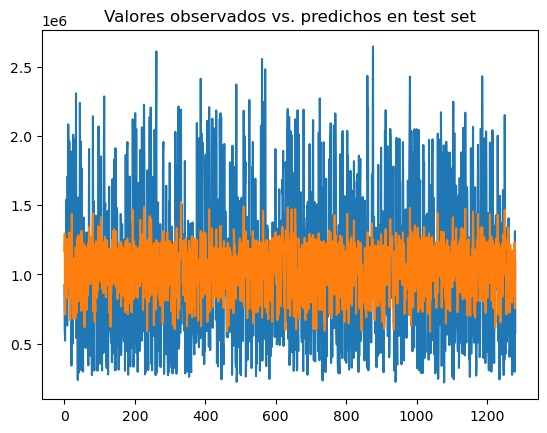

In [137]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

# 12. Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo.

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
sc = StandardScaler()

In [140]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Entrenar el modelo con los datos de entrenamiento

Una vez tenemos nuestros diferentes conjuntos de datos, procedemos a entrenar al modelo:

In [141]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

### Realizar las predicciones con datos de entrenamiento

In [142]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

#### R^2

In [143]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std)
print('El R^2 del subconjunto de prueba es:' , r_square_test_std)

El R^2 del subconjunto de entrenamiento es: 0.1381876013522303
El R^2 del subconjunto de prueba es: 0.15116329440192455


#### Predicciones es el subgrupo de datos de entrenamiento

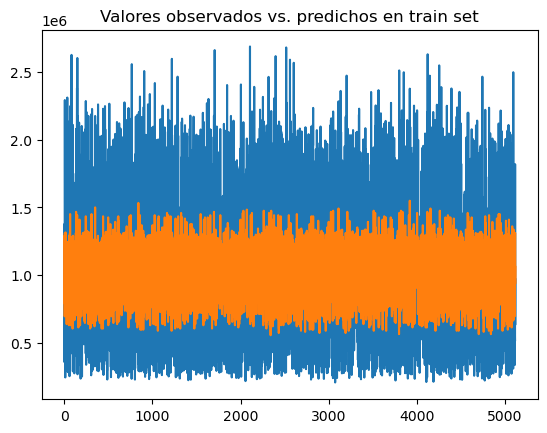

In [144]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

#### Predicciones es el subgrupo de datos de prueba

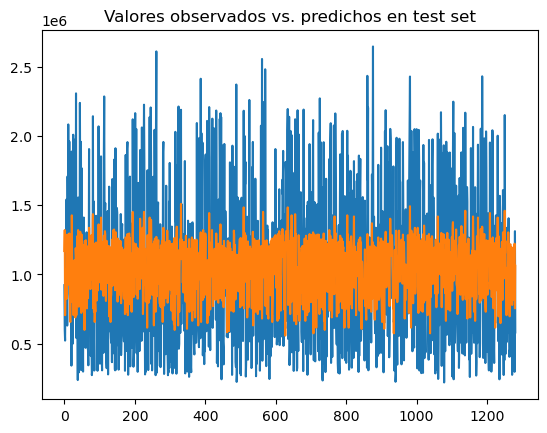

In [145]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

### Extraer los coeficientes

In [146]:
X = df[df.columns.difference(['Venta_semanal'])]
y = df.Venta_semanal

In [147]:
importancia = modelo_regresion_std.coef_

In [148]:
# Resumen
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: -27175.23114
Variable explicativa No. 1, Score: 2272720482237039360.00000
Variable explicativa No. 2, Score: 10619223786812106752.00000
Variable explicativa No. 3, Score: 8000.00000
Variable explicativa No. 4, Score: -1801276386502017536.00000
Variable explicativa No. 5, Score: 1794599042103440896.00000
Variable explicativa No. 6, Score: 27225173281366851584.00000
Variable explicativa No. 7, Score: 27391322402178744320.00000


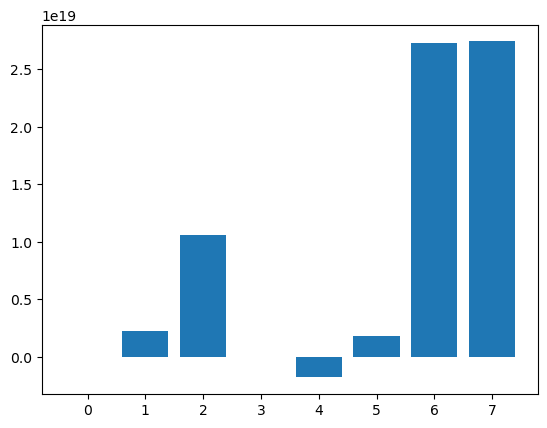

In [149]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

Entre las variables con mayor poder explicativo están:

* Venta semanal
* ICP
* Desempleo

Un valor de "feature importance" negativo significa que esa característica hace que aumente la función de costos, por lo que el modelo no hace un buen uso de esa característica:
* Temperatura
